# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [35]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [23]:
countries = pd.read_csv("countries.csv")

In [24]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [25]:
countries['Pop_density']

0       48,0
1      124,6
2       13,8
3      290,4
4      152,1
       ...  
222    419,9
223      1,0
224     40,6
225     15,3
226     31,3
Name: Pop_density, Length: 227, dtype: object

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [26]:
novo_df = countries.copy()
string_to_float = ['Pop_density', 'Coastline_ratio', 'Net_migration', 'Infant_mortality',
       'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

novo_df[string_to_float] = novo_df[string_to_float].replace({',': '.'}, regex=True).astype(float)

str_columns = novo_df.columns[novo_df.dtypes == object]

novo_df[str_columns] = novo_df[str_columns].apply(lambda x: x.str.strip())

In [27]:
    discretizer = KBinsDiscretizer( n_bins=10, encode='ordinal', strategy='quantile')
    discretizer.fit(novo_df[['Pop_density']])
    pop_discretized = discretizer.transform(novo_df[['Pop_density']])
    discretizer.bin_edges_

array([array([0.00000e+00, 1.01400e+01, 2.12200e+01, 3.94800e+01, 5.98000e+01,
       7.88000e+01, 1.05540e+02, 1.50120e+02, 2.53700e+02, 3.96740e+02,
       1.62715e+04])], dtype=object)

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [28]:
def q1():
    # Retorne aqui o resultado da questão 1.
    a = list(novo_df['Region'].unique())
    a.sort()
    return(a)
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [29]:
def q2():
    discretizer = KBinsDiscretizer( n_bins=10, encode='ordinal', strategy='quantile')
    discretizer.fit(novo_df[['Pop_density']])
    pop_discretized = discretizer.transform(novo_df[['Pop_density']])
    quantile_90 = np.quantile(pop_discretized,0.9)
    return int(sum(pop_discretized > quantile_90))
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [30]:
novo_df['Climate'] = novo_df['Climate'].fillna(novo_df['Climate'].mean())

In [31]:
def q3():

    one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
    one_hot_encoder.fit(novo_df[['Region', 'Climate']])
    onehotencoded = one_hot_encoder.transform(novo_df[['Region', 'Climate']])
    return int(onehotencoded.shape[1])
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [32]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [33]:
def q4():
    num_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='median')),
    ('StandardScaler', StandardScaler())
    ])
    intfloat_columns = novo_df.columns[(novo_df.dtypes == 'int64')
                                  | (novo_df.dtypes == float)]
    # Aplicando o ajuste e transformação no dataframe com as variáveis 'int' e 'float'
    pipeline_transformation = num_pipeline.fit_transform(novo_df[intfloat_columns])
    
    # Aplicando a transformação na lista test_country apenas nos valores 'float'
    pipeline_test_country = num_pipeline.transform([test_country[2:]])
    
    # Retornando um float com a posição referente a variável 'Arable'
    return float(np.round((pipeline_test_country[0,9]),3))
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

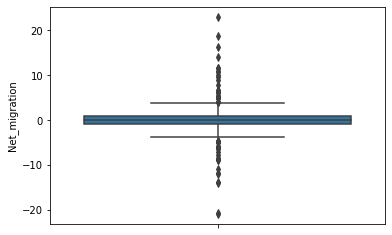

In [34]:
sns.boxplot(novo_df['Net_migration'], orient="vertical");

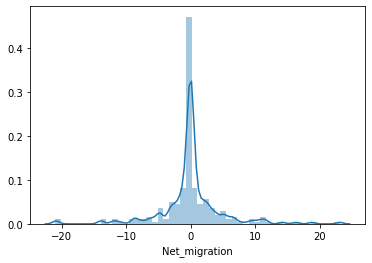

In [15]:
sns.distplot(novo_df['Net_migration'])

In [36]:
def q5():
    q1 = novo_df['Net_migration'].quantile(0.25)
    q3 = novo_df['Net_migration'].quantile(0.75)
    iqr = q3 - q1
    limites_iqr = [q1-(1.5*iqr), q3+(1.5*iqr)]
    outliers_acima = sum(novo_df['Net_migration'] > limites_iqr[1])
    outliers_abaixo = sum(novo_df['Net_migration'] < limites_iqr[0])
    boolean = False
    return ((outliers_abaixo, outliers_acima, boolean))
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [17]:
categorias = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset="train", categories=categorias, shuffle=True, random_state=42)

In [18]:
def q6():
    count_vectorizer = CountVectorizer()
    ng_counts = count_vectorizer.fit_transform(newsgroups.data)
    return int(ng_counts[:,count_vectorizer.vocabulary_['phone']].sum())
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [19]:
def q7():
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(newsgroups.data)
    ng_tfidf_vectorized = tfidf_vectorizer.transform(newsgroups.data)
    return float(np.round(ng_tfidf_vectorized[:, tfidf_vectorizer.vocabulary_['phone']].sum(),3))
q7()

8.888